# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [ ]:
# load libraries
library(tidyverse)
#library(ggplot2)
#library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Set your working directory to the location of the data
setwd("/user_data/csimmon2/git_repos/Simmons_DSPN_S25/Homework datasets/hcp_data")

# Read the data
hcp_data <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

# Create d1 dataframe with only the required variables and remove NA values
d1 <- hcp_data %>%
  select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
  na.omit()
# Look at the first few rows
head(d1)

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632
7,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

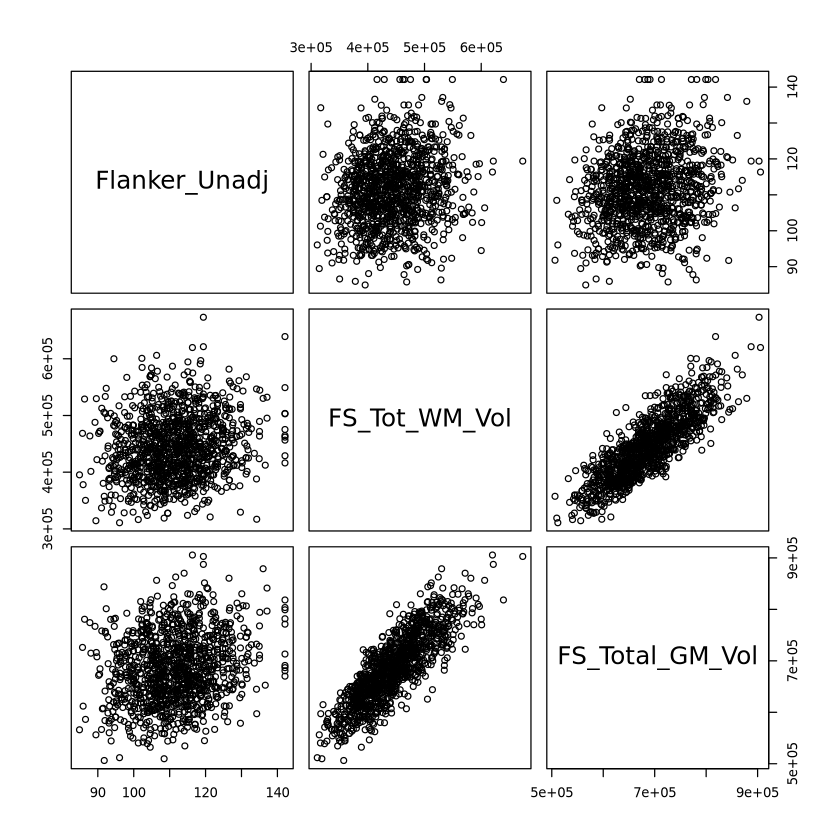

In [ ]:
# Create pairwise scatterplots
pairs(d1[, 3:5])  # Exclude Subject and Gender, not numeric

> *Write your response here.* 
>
FS_Tot_WM_Vol and FS_Total_GM_Vol are positively correlated

Flanker_Unadj and FS_Tot_WM_Vol have very weak positively correlation with a lot of scatter

Flanker_Unadj and FS_Total_GM_Vol have very weak positively correlation with a lot of scatter

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [8]:
# Fit linear model: Flanker_Unadj ~ FS_Total_GM_Vol
model <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

# Show summary of the model
summary(model)

# Get coefficient values
coef(model)

# Get 95% confidence intervals
confint(model, level = 0.95)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


Based on the linear regression analysis examining the relationship between Flanker Task performance (Flanker_Unadj) and total grey matter volume (FS_Total_GM_Vol): β = 3.11 × 10^-5, p < 0.001 indicates a statistically significant positively correlation with Flanker Task performance, providing evidence against the null hypothesis. Despite p < 0.001, the effect side is small. R² value of 0.0428 indicates that grey matter volume explains only 4.28% of the variance in Flanker Task. The F-statistic(1,1111) = 49.68, p < 0.001 suggests the model improves with predictors.

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula = 'y ~ x'


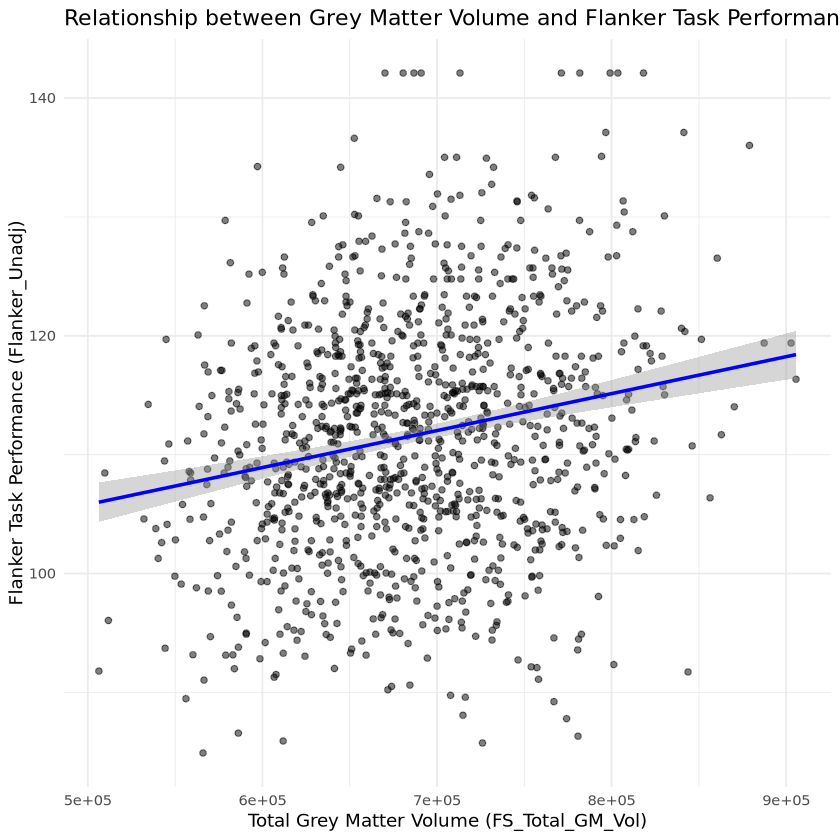

In [9]:
# Create ggplot with regression line and confidence intervals
ggplot(d1, aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Relationship between Grey Matter Volume and Flanker Task Performance",
       x = "Total Grey Matter Volume (FS_Total_GM_Vol)",
       y = "Flanker Task Performance (Flanker_Unadj)") +
  theme_minimal()

The scatterplot shows a positive relationship between grey matter volume and Flanker task performance. The narrow confidence interval suggests the relationship is statistically significant despite being weak.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

Based on the linear regression analysis examining the relationship between Flanker Task performance (Flanker_Unadj) and total grey matter volume (FS_Total_GM_Vol): β = 3.11 × 10^-5, p < 0.001 indicates a statistically significant positively correlation with Flanker Task performance, providing evidence against the null hypothesis. Despite p < 0.001, the effect side is small. R² value of 0.0428 indicates that grey matter volume explains only 4.28% of the variance in Flanker Task. The F-statistic(1,1111) = 49.68, p < 0.001 suggests the model improves with predictors. The scatterplot shows a positive relationship between grey matter volume and Flanker task performance. The narrow confidence interval suggests the relationship is statistically significant despite being weak. This finding suggests that total grey matter volume is not a a strong predictor of Flanker Task performance.

**DUE:** 5pm EST, February 24, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*